# 04 __Statistical Inference__

There is not only one way to address the problem of statistical inference. In fact,
there are two main approaches to statistical inference: the frequentist
and Bayesian approaches, Their diiferences are sublte but fundamental:

 + In the case of _frequentist apprach_, the main assumption is that there is
   a population, which can be represented by several parameters, from which
   we can obtain numerous random samples. The only way to derive the information
   aboyt these parameters is to take a sample of the population, to compute
   the parameters of the sample an to use statistical inference techqiniques to
   make probable propositions regarding population parameters.
   
 + The _Bayesian apprach_ is based on a considereation that data are fixed, not 
   the result of a repeatable sampling process, but parameters describing data
   can be described proabilisitically. To this end, Bayersian inference methods focus
   on reproducing parameter distributions that represent all the knowledge we 
   can extract from the sample and from prioir information about the problem.
   



The assumptions are related in the first case to a sampling process; and to a statistical
model in the second case. Correct inference requires these assumptions to be correct.
The fulfillment of this requirement is not part of the method, but it is the responsibility
of the data scientist.

## __Frequentist Approach to Statistical Inference__

If we adopt the frequentist approach, is to produce probable
propositions concerning population param-
eters from analysis of a sample. The most important classes of propositions are as
follows:

 + Propositions about _point estimates_. Apoint estimate is a particular value that
   best approximates some parameter of interest. For example, the mean or the
   variance of a sample.
   
 + Propositions about _confidence intervals_ or _set estimates_. A confidence interval
   is a range of values that best represents some parameter of interest.
   Propositions about the acceptance or rejection of a _hypothesis_.
   
  

In all these cases, the production of propositions is based on a simple assumptions:
we can estimate the probability that the result represented by the proposition
has been caused by chance. The estimation of this probability by sound method is one
of the main topics of statistics.

## __Measuring the Variability in Estimates__

Estimates produced by descriptive statistics are not equal to the truth but they are
better as more data become available. So, it makes sense to use them as central
elements of our propositions and to measure its variability with respect to the sample
size.

### __Point Estimates__

Let us suppose that we are interested in describing the daily number of
traffic accidents in the streets of Barcelona in 2013. If we have access to the population, the
computation of this parameter is a simple operation: the total number of accidents
divided by 365.

In [24]:
import numpy as np
import pandas as pd
data = pd.read_csv(
    'input/accidents_gu_bnc_2013.csv'
)

In [25]:
data.head()

,N�mero d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripci� dia setmana,Dia de setmana,...,Hora de dia,Descripci� torn,Descripci� causa vianant,N�mero de morts,N�mero de lesionats lleus,N�mero de lesionats greus,N�mero de v�ctimes,N�mero de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,152600,Guinard�,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Mat�,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,161407,Ind�stria,0224 0224,Dimarts,2,...,10,Mat�,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Mart�,101-10-64,el Camp de l'Arpa del Clot,161101,Independ�ncia,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [26]:
data.columns

Index(['N�mero d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripci� dia setmana', 'Dia de setmana', 'Descripci� tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripci� torn', 'Descripci� causa vianant', 'N�mero de morts',
       'N�mero de lesionats lleus', 'N�mero de lesionats greus',
       'N�mero de v�ctimes', 'N�mero de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [27]:
import os
import re
import unicodedata


def strip_accents(text:str) -> str:
    """
    Strip accents from input String.
    
    arguments
    ---------
        text: text to be parsed
    
    returns
    -------
        text: parsed text with accents removed
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)



def parse_col_names(colnames_list: list) -> dict:
    """
    Parses the column names to a standard format:
    removes parentheses, slashes and $,
    converts every character to lower case, and converts
    blank spaces to `_`.
    arguments
    ---------
        colnames_list: a list-like structure that haves
            the current names of the columns to be parsed.
    
    returns
    -------
        new_col_names: a dictionary containing the old column names
            and their respective parsed names.
    """
    new_col_names = {key: 0 for key in colnames_list}
    for key, value in new_col_names.items():
        text = strip_accents(key.lower())
        text = re.sub(' - ', '_', text)
        text = re.sub('/[ ]+', '_', text)
        text = re.sub('[ ]-+', '_', text)
        text = re.sub('[. ]+', '_', text)
        text = re.sub('[ ]+', '_', text)
        text = re.sub('[-]+', '_', text)
        text = re.sub('[^0-9a-zA-Z_-]', '', text)

        # assign to dict key the new_col_name
        new_col_names[key] = text
        
    # remove the _ left at the start and/or end of the string
    for key, value in new_col_names.items():
        text = re.sub('^_*|_*$', '', value)
        new_col_names[key] = text
        
    return new_col_names

In [28]:
data = data.rename(columns = parse_col_names(data.columns))

In [29]:
data['date'] = data['dia_de_mes'].apply(lambda x: str(x)) + '-' + \
               data['mes_de_any'].apply(lambda x: str(x)) + '-'+ '2013'

In [30]:
data['date']

0       16-10-2013
1       29-10-2013
2        23-7-2013
3        26-2-2013
4       18-11-2013
           ...    
9452    10-11-2013
9453      5-9-2013
9454     14-8-2013
9455     20-2-2013
9456     23-9-2013
Name: date, Length: 9457, dtype: object

In [31]:
data['date'] = pd.to_datetime(data['date'])
accidents = data.groupby(['date']).size()

In [32]:
print(accidents.mean())

25.90958904109589


But now, for illustrative purposes, let us suppose that we only have access to a
limited part of the data (the sample): the number of accidents during some days of
2013. Can we still give an approximation of the population mean?
The most intuitive way to go about providing such a mean is simply to take the
sample mean. The sample mean is a point estimate of the population mean. If we can
only choose one value to estimate the population mean, then this is our best guess.

The problem we face is that estimates generally vary from one sample to another,
and this sampling variation suggests our estimate may be close, but it will not be
exactly equal to our parameter of interest. How can we measure this variability?

In our example, because we have access to the population, we can empirically build
the sampling distribution of the sample mean for a given number of observations.
Then, we can use the sampling distribution to compute a measure of the variability.

In [49]:
# making an empirical sample distribution of the mean
# s = 100000, n = 200

# population
accs = accidents.to_frame()
s = 10000; n = 200; means = []

# sample generation
for i in range(0, s):
    print(f'{i:03d} / {s:03d}', end = '\r')
    rows = np.random.choice(accs.index.values, n)
    sample = accidents.loc[rows]
    means.append(sample.mean())

In [50]:
means = pd.Series(means)

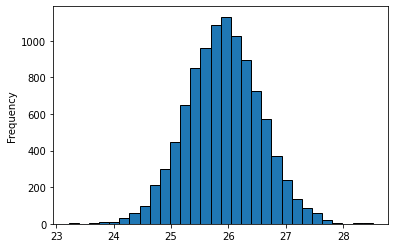

In [51]:
import matplotlib.pyplot as plt
means.plot.hist(bins = 30, edgecolor = 'k')
plt.show()

In general, given a point estimate from a sample of size n, we define its sampling
distribution as the distribution of the point estimate based on samples of size n
from its population. This definition is valid for point estimates of other population
parameters, such as the population median or population standard deviation, but we
will focus on the analysis of the sample mean.

The sampling distribution of an estimate plays an important role in understanding
the real meaning of propositions concerning point estimates. It is very useful to think
of a particular point estimate as being drawn from such a distribution.

#### __The traditional approach__

In real problems, we do not have access to the real population and so estimation
of the sampling distribution of the estimate from the empirical distribution of the
sample replications is not an option. But this problem can be solved by making use
of some theoretical results from traditional statistics.

I can be mathematically shown that given _n_ independent observations
$\{x_i\}_i = 1, 2, ...,n$ of a population with a standard deviation
$\sigma_x$, the standard deviation of the sample mean $\sigma_\bar{x}$,
or _standard error_, can be approximated by:

$$ SE = \frac{\sigma_x}{\sqrt{n}} $$

This formula uses the standard deviation of the population $\sigma_x$ , which is not known,
but it can be shown that if it is substituted by its empirical estimate $\hat{\sigma}_x $  , the estimation
is sufficiently good if n > 30 and the population distribution is not skewed. This
allows us to estimate the standard error of the sample mean even if we do not have
access to the population.
So, how can we give a measure of the variability of the sample mean? The answer
is simple: by giving the empirical standard error of the mean distribution.

In [36]:
import math
rows = np.random.choice(accs.index.values, 200)
sample = accs.loc[rows]
est_sigma_mean = sample.std() / math.sqrt(200)

In [53]:
print(
    'direct estimation of SE from one sample of 200 elements: ', est_sigma_mean.mean()
)

print(
    'estimation of the SE by simulating 1000 samples of 200 elements: ', np.array(means).std()
)

direct estimation of SE from one sample of 200 elements:  0.6084563217498745
estimation of the SE by simulating 1000 samples of 200 elements:  0.6379453367630725


Unlike the case of the sample mean, there is no formula for the standard error of
other interesting sample estimates, such as the median.

Unlike the case of the sample mean, there is no formula for the standard error of
other interesting sample estimates, such as the median.

### __Computationally Intensive Approach__

Let us consider from now that our full dataset is a sample from a hypothetical
population (this is the most common situation when analyzing real data!).
A modern alternative to the traditional approach to statistical inference is the
_bootstrapping_ method. In the bootstrap, we draw _n_ observations with replacement
from the original data to create a bootstrap sample or resample. Then, we can calculate
the mean for this resample. By repeating this process a large number of times, we
can build a good approximation of the mean sampling distribution.

In [88]:
def mean_bootstrap(X, numberb):
    x = [0] * numberb
    for i in range(0, numberb):
        sample = [
            X[j] for j in np.random.randint(len(X), size = len(X))
        ]
        x[i] = np.mean(sample)
        print(
            f'bstrp: {i:5d} / {numberb:5d}| mean(sample): {np.mean(sample):4.4f}', end = '\r'
        )
    return x

m = mean_bootstrap(accidents, 10000)

In [90]:
m_series = pd.Series(m)

In [89]:
print('mean estimate: ', np.mean(m))

mean estimate:  25.912499726027395


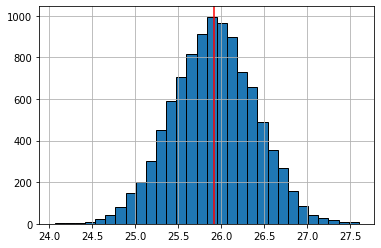

In [102]:
m_series.hist(bins = 30, edgecolor = 'k')
plt.axvline(m_series.mean(), color = 'r')
plt.show()

The basic idea of the bootstrapping method is that the observed sample contains
sufficient information about the underlying distribution. So, the information we can
extract from resampling the sample is a good approximation of what can be expected
from resampling the population.
The bootstrapping method can be applied to other simple estimates such as the
median or the variance and also to more complex operations such as estimates of
censored data.

### __Confidence Intervals__